#### User Story 3 : Entraînement des modèles de clustering avec K-Means



**Déterminer la valeur optimale de k via la méthode du coude et silhouette**

Text(0.5, 0.98, ' la courbe d’inertie  pour appuyer le choix de k.')

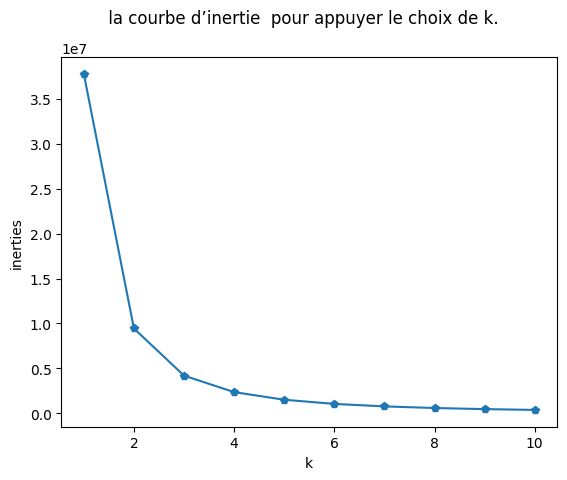

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("../data/processed/diabetes_data_cleaned_standardized.csv")
K=range(1,11)
inerties=[]
for k in K :
    k_means_model=KMeans(n_clusters=k,random_state=42)
    k_means_model.fit(df)
    inerties.append(k_means_model.inertia_)
plt.plot(K,inerties,marker="p")
plt.xlabel("k")
plt.ylabel("inerties")
plt.suptitle(" la courbe d’inertie  pour appuyer le choix de k.")

**Visualiser la courbe d’inertie et silhouette pour appuyer le choix de k**

Text(0.5, 0.98, ' la courbe de silhouette pour appuyer le choix de k.')

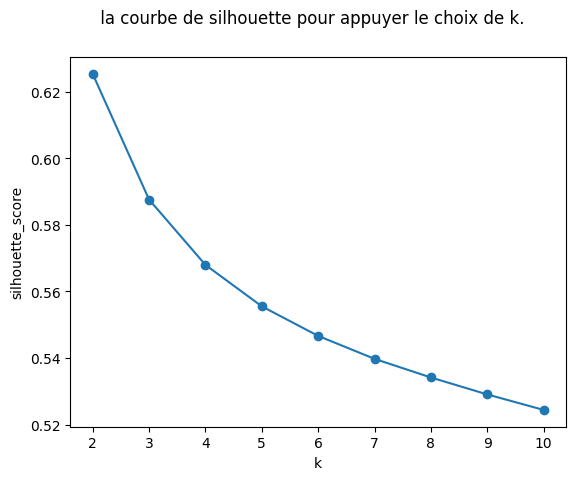

In [12]:
from sklearn.metrics import silhouette_score

K=range(2,11)
silhouette_sc=[]
for k in K :
    model_kmeans=KMeans(n_clusters=k,random_state=42)
    model_kmeans.fit(df)
    silhouette=silhouette_score(df,model_kmeans.labels_)
    silhouette_sc.append(silhouette)

plt.plot(K,silhouette_sc,marker="o")
plt.xlabel("k")
plt.ylabel("silhouette_score")
plt.suptitle(" la courbe de silhouette pour appuyer le choix de k.")